In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/ai-developer-productivity-dataset")

print("Path to dataset files:", path)

100%|██████████| 5.85k/5.85k [00:00<00:00, 1.09MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/atharvasoundankar/ai-developer-productivity-dataset/versions/1


In [1]:
from google.colab import files
uploaded = files.upload()

Saving ai_dev_productivity.csv to ai_dev_productivity.csv


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
df=pd.read_csv('ai_dev_productivity.csv')
df

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
...,...,...,...,...,...,...,...,...,...
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0


In [ ]:
df.columns

Index(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load',
       'task_success'],
      dtype='object')

In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
yes_count=df['hours_coding'].value_counts()
yes_count

,count
hours_coding,
3.80,5
6.03,5
5.14,4
4.06,4
6.63,4
...,...
4.79,1
3.89,1
8.93,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_coding,500.0,5.01560,1.947253,0.0,3.6000,5.03,6.275,12.00
coffee_intake_mg,500.0,463.19200,142.334991,6.0,369.5000,500.50,600.000,600.00
distractions,500.0,2.97600,1.678409,0.0,2.0000,3.00,4.000,8.00
sleep_hours,500.0,6.97580,1.455965,3.0,6.1000,6.95,7.900,10.00
commits,500.0,4.60800,2.704990,0.0,3.0000,5.00,6.000,13.00
bugs_reported,500.0,0.85800,1.102846,0.0,0.0000,0.00,2.000,5.00
ai_usage_hours,500.0,1.51092,1.085557,0.0,0.6975,1.26,2.070,6.36
cognitive_load,500.0,4.49820,1.868861,1.0,3.1750,4.40,5.800,10.00
task_success,500.0,0.60600,0.489124,0.0,0.0000,1.00,1.000,1.00


In [ ]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [ ]:
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
hours_coding,0,0.0
coffee_intake_mg,0,0.0
distractions,0,0.0
sleep_hours,0,0.0
commits,0,0.0
bugs_reported,0,0.0
ai_usage_hours,0,0.0
cognitive_load,0,0.0
task_success,0,0.0


<Axes: >

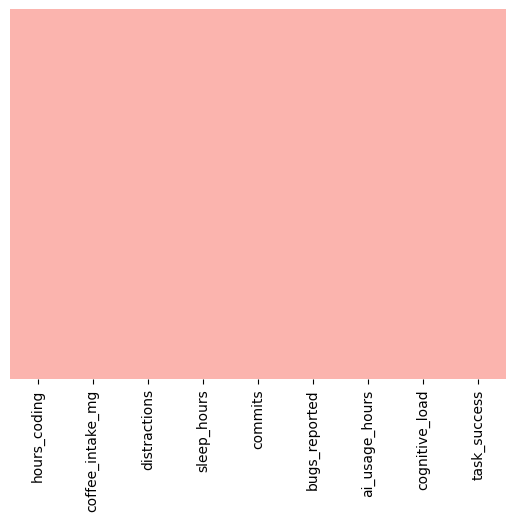

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

In [ ]:
sns.set(style="whitegrid")

Text(0.5, 1.0, 'Distribution of Coding Hours')

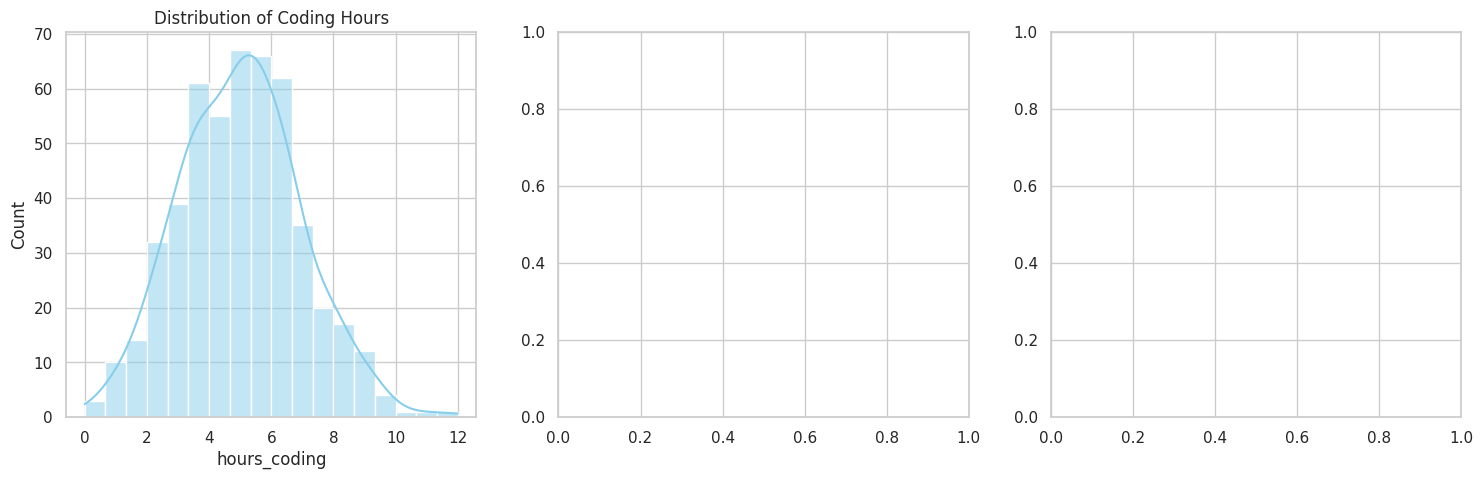

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['hours_coding'], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution of Coding Hours")

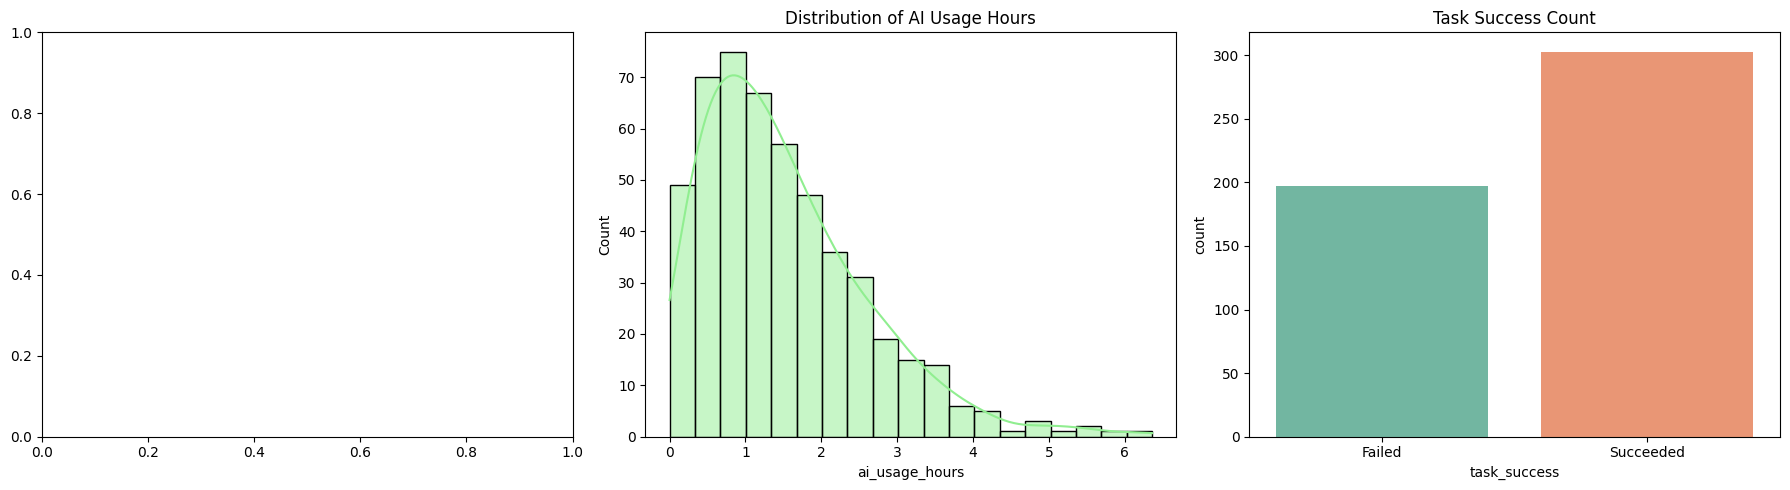

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['ai_usage_hours'], kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title("Distribution of AI Usage Hours")
sns.countplot(x='task_success', hue='task_success', data=df, ax=axes[2], palette="Set2", legend=False)
axes[2].set_title("Task Success Count")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Failed', 'Succeeded'])
plt.tight_layout()
plt.show()

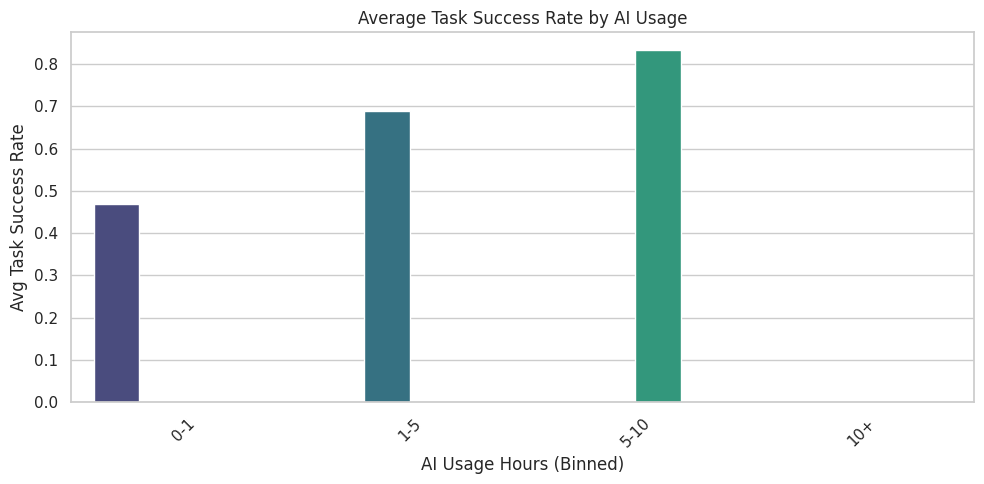

In [13]:
# Group and calculate mean task success

# Define the bins and labels for AI usage hours
bins = [0, 1, 5, 10, float('inf')]
labels = ['0-1', '1-5', '5-10', '10+']

# Create the 'ai_usage_bin' column by binning 'ai_usage_hours'
# This is the new line that fixes the KeyError
df['ai_usage_bin'] = pd.cut(df['ai_usage_hours'], bins=bins, labels=labels, right=False)
# Group and calculate mean task success

grouped = df.groupby('ai_usage_bin', observed=True)['task_success'].mean().reset_index()

# Barplot of AI usage bin vs success rate
plt.figure(figsize=(10, 5))
sns.barplot(x='ai_usage_bin', y='task_success', hue='ai_usage_bin', data=grouped, palette="viridis", legend=False)

plt.title("Average Task Success Rate by AI Usage")
plt.ylabel("Avg Task Success Rate")
plt.xlabel("AI Usage Hours (Binned)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = df.dropna()

In [25]:

# Define features and target
X = df.drop(["task_success"], axis=1)
y = df["task_success"]

In [26]:

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Predict on test set
y_pred = clf.predict(X_test)

In [31]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[34  0]
 [ 0 66]]


In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        66

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



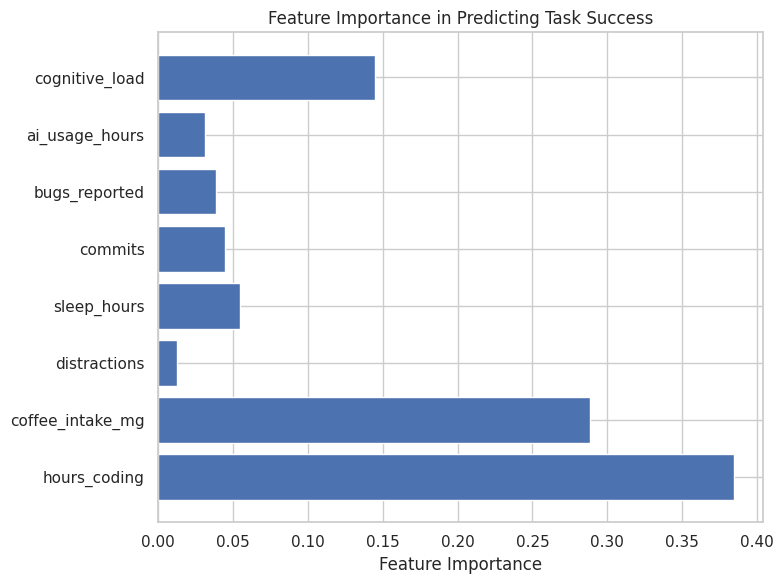

In [33]:
# Plot feature importances
importances = clf.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting Task Success")
plt.tight_layout()
plt.show()

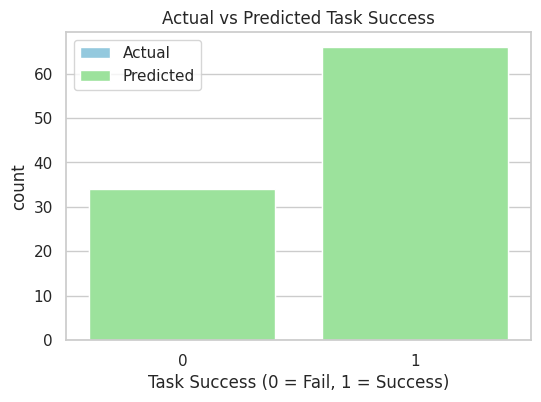

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, label='Actual', color='skyblue')
sns.countplot(x=y_pred, label='Predicted', color='lightgreen')
plt.title("Actual vs Predicted Task Success")
plt.legend(["Actual", "Predicted"])
plt.xlabel("Task Success (0 = Fail, 1 = Success)")
plt.show()

In [ ]:
X = df[['hours_coding', 'ai_usage_hours']]  # Features
y = df['task_success']                      # Target

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
mae

0.13

In [ ]:
mse

0.13

In [ ]:
rmse

np.float64(0.36055512754639896)

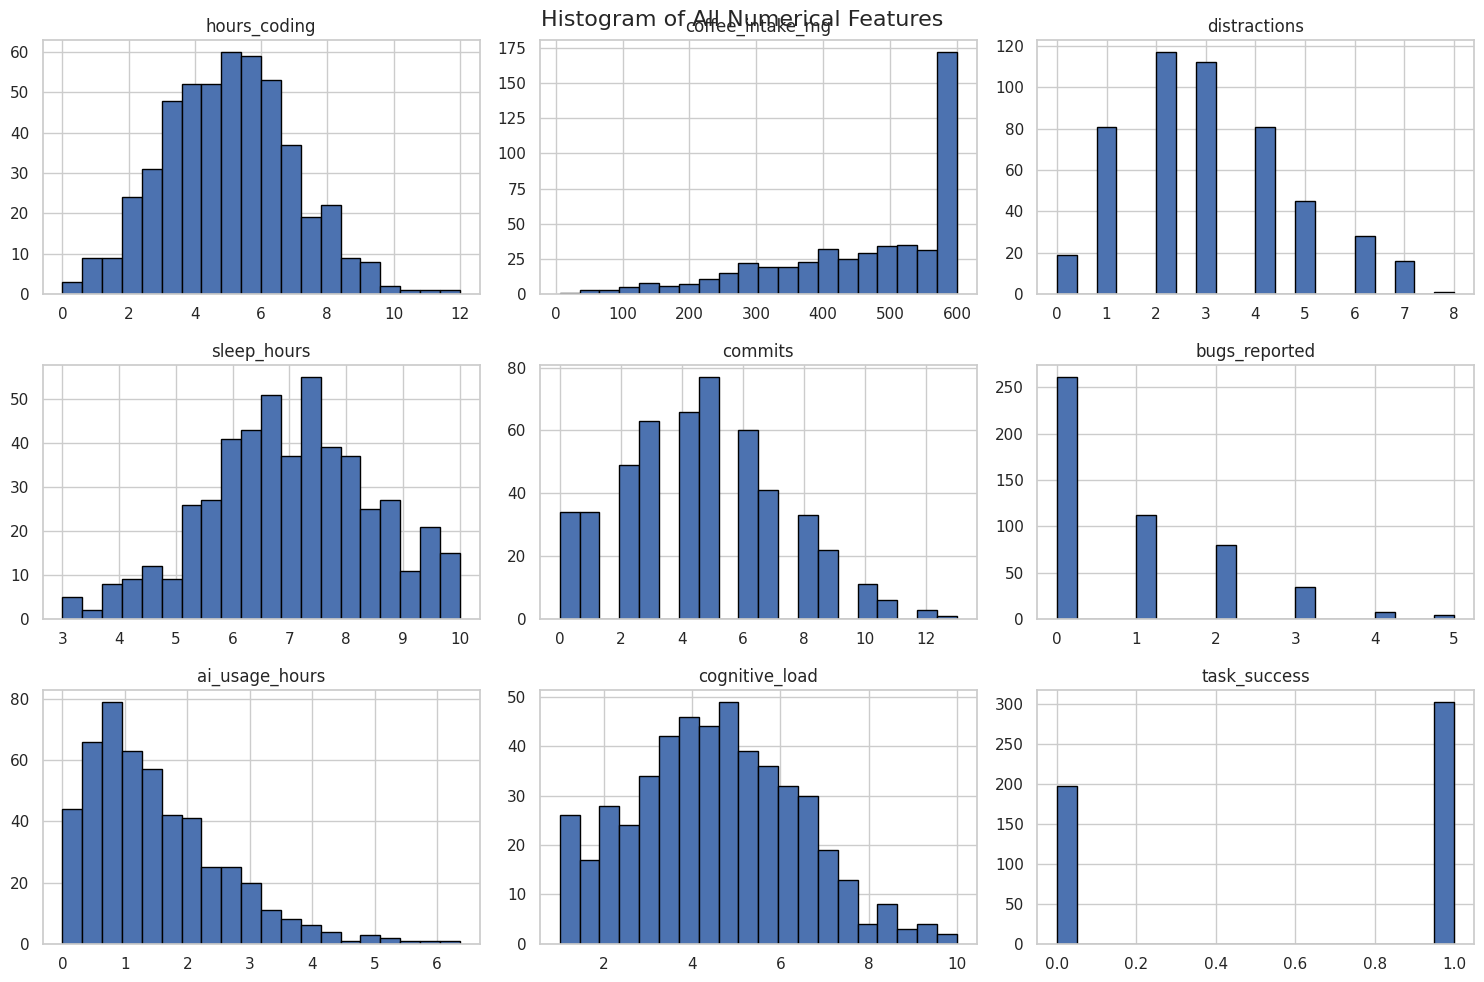

In [11]:
sns.set(style="whitegrid")

# Create histograms for all numerical columns
df.hist(bins=20, figsize=(15, 10), edgecolor='black')

# Add overall title and adjust layout
plt.suptitle("Histogram of All Numerical Features", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)

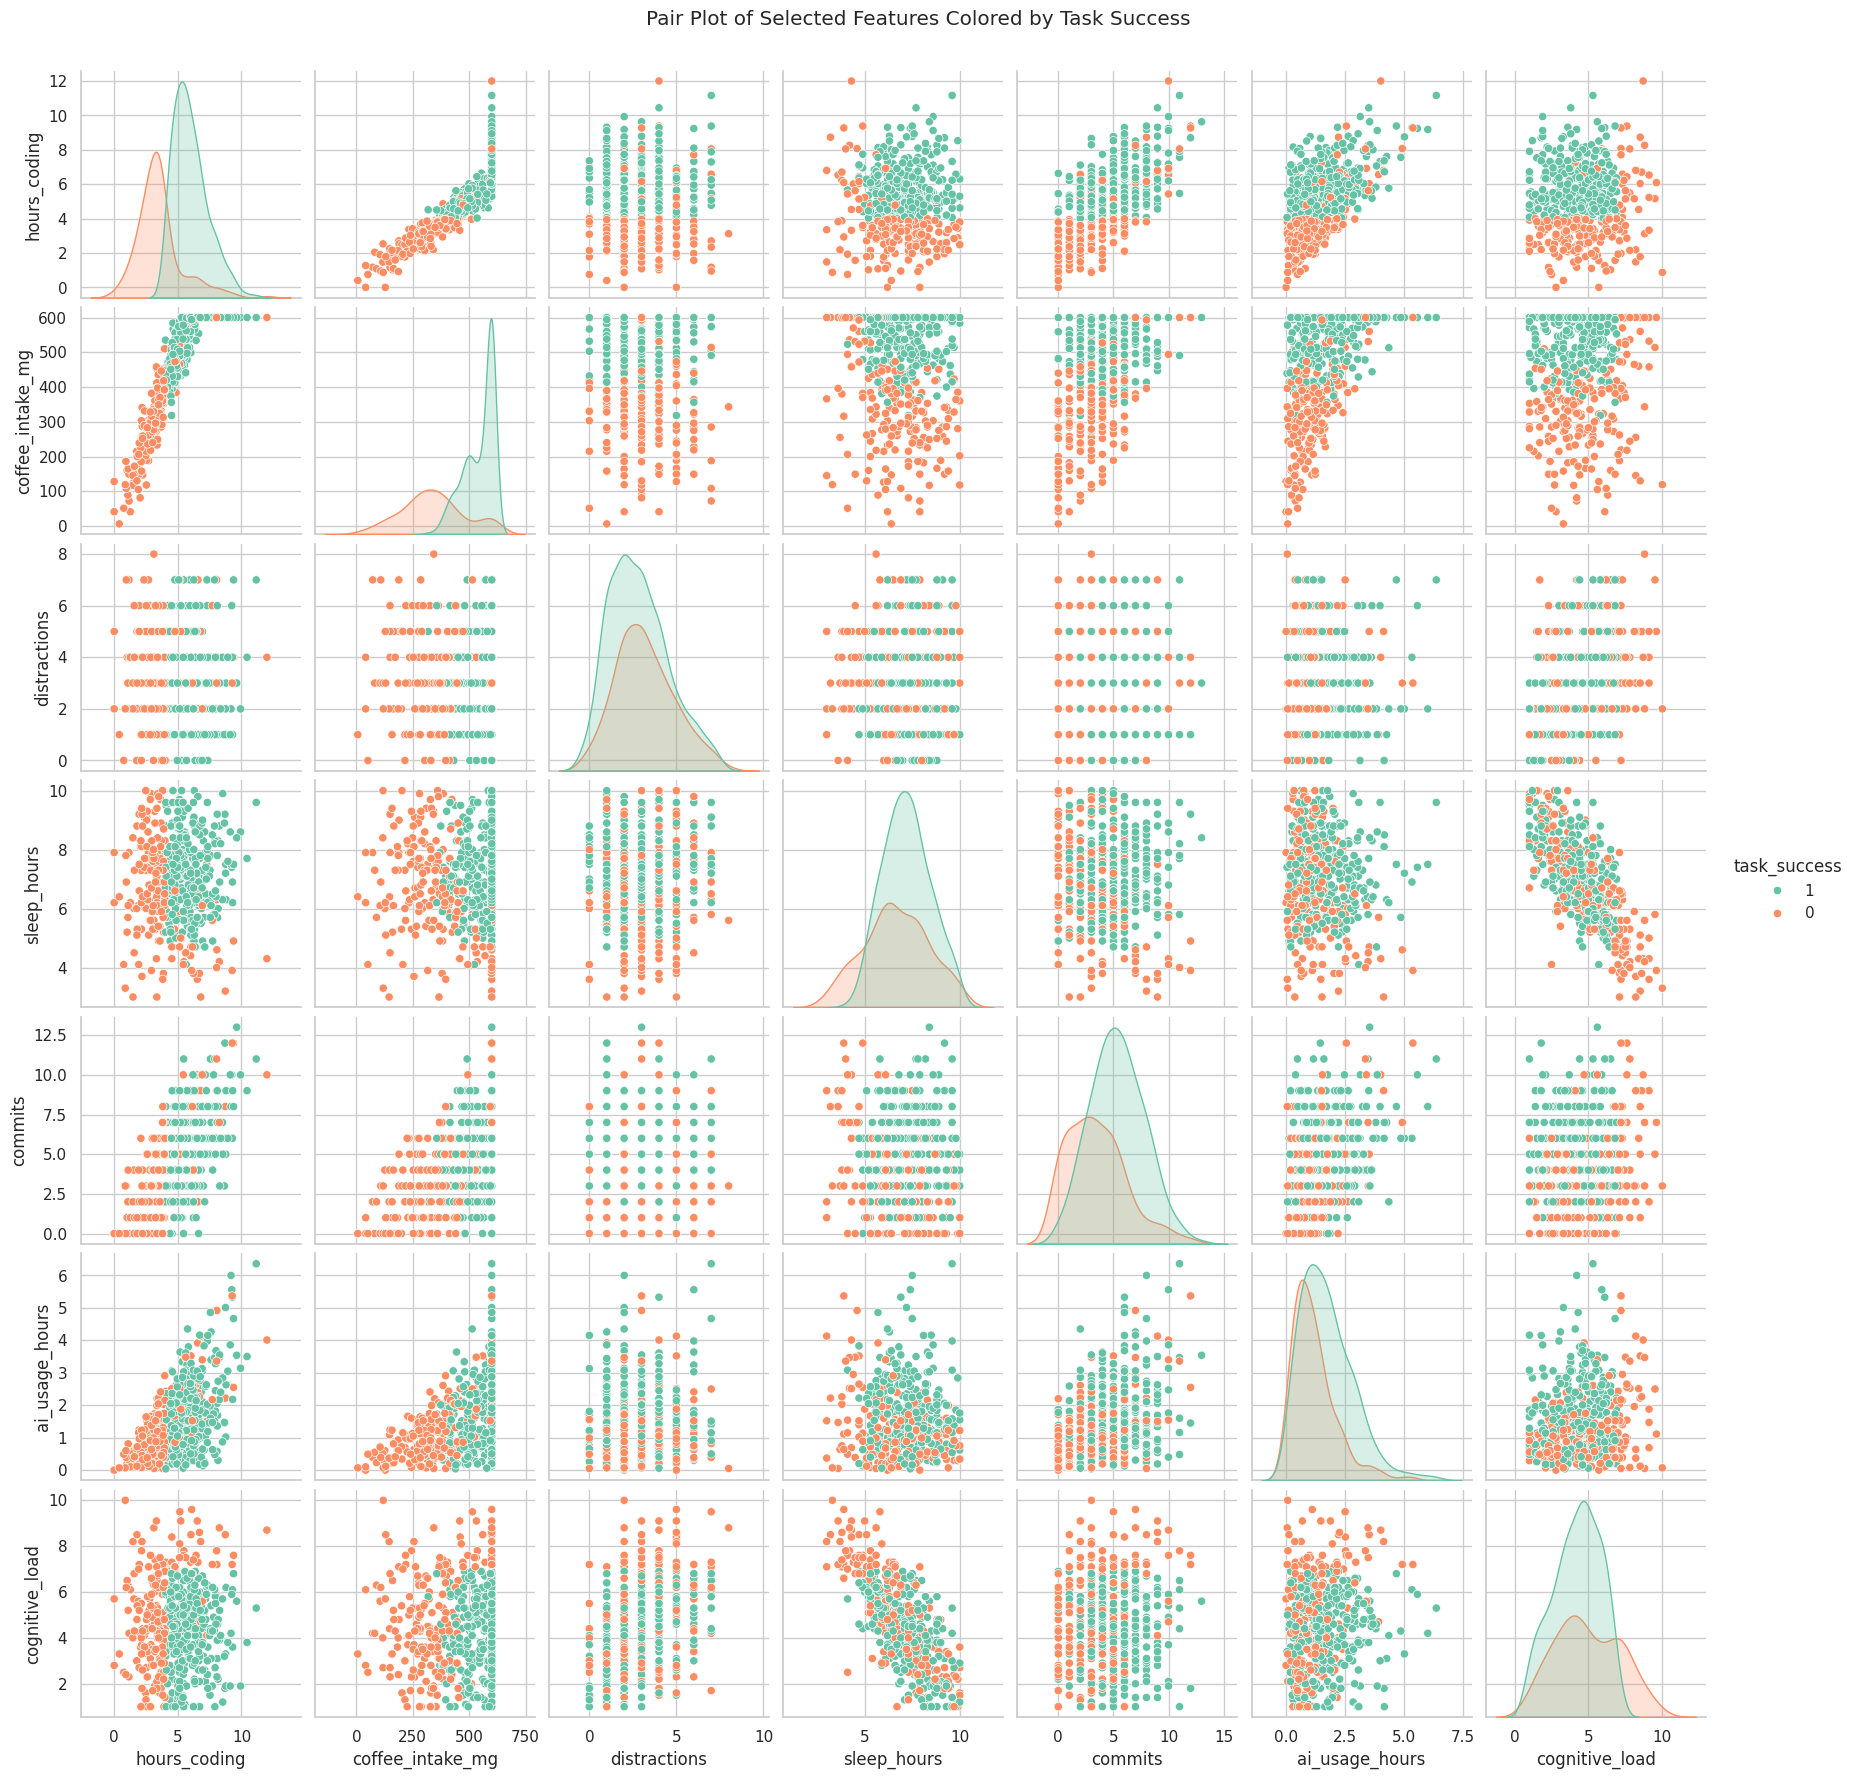

In [14]:
df['task_success'] = df['task_success'].astype(str)

# Select relevant features for the pair plot
selected_features = [
    "hours_coding",
    "coffee_intake_mg",
    "distractions",
    "sleep_hours",
    "commits",
    "ai_usage_hours",
    "cognitive_load",
    "task_success"
]

# Generate the pair plot
sns.pairplot(df[selected_features], hue="task_success", palette="Set2")
plt.suptitle("Pair Plot of Selected Features Colored by Task Success", y=1.02)
plt.show()

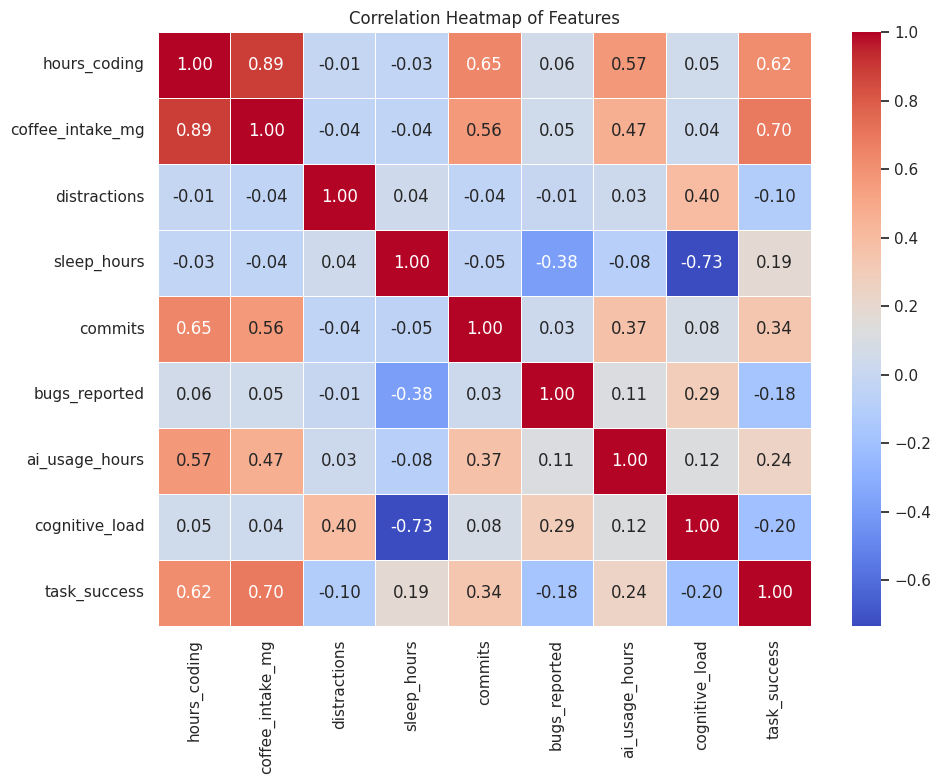

In [37]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set plot style
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
# Add title
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()